In [1]:
from iir_filter import *
from scipy.signal import zpk2tf
from deltasigma import *
from sympy import symbols, Poly, simplify, init_printing  # Add these imports

# Set parameters
form = 'CRFBD'
f0 = 0.0
Hinf = 4
OSR = 8
M = 4
ORD = 5

# Synthesize the NTF
H = synthesizeNTF(ORD, OSR, 1, Hinf, f0)

# Realize the NTF
a, g, b, c = realizeNTF(H, form)

# Create the ABCD matrix
ABCD = stuffABCD(a, g, b, c, form)

# Scale the ABCD matrix
ABCDs, umax, S = scaleABCD(ABCD, M+1)

# Calculate the transfer functions
[ntfs, stfs] = calculateTF(ABCDs)

# Convert NTFs to transfer function form
ntfs_nd = zpk2tf(ntfs[0], ntfs[1], ntfs[2])

# Initialize pretty printing for sympy
init_printing()

# Define the symbolic variable z
z = symbols('z')

# Create the polynomial expressions
Numerator = Poly(ntfs_nd[0], z)
Denominator = Poly(ntfs_nd[1], z)

# Calculate the Noise Transfer Function (NTF)
NTFS = Numerator / Denominator

# Simplify the expression for the Error Transfer Function (ETF)
He = simplify(1 - NTFS)


/home/urosminoski/anaconda3/envs/deltasigma/lib/python3.7/site-packages/deltasigma-0.2.2-py3.7.egg/deltasigma/_realizeNTF.py:243: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a = -np.real(np.linalg.lstsq(T.T, L1.T)[0]).T
/home/urosminoski/anaconda3/envs/deltasigma/lib/python3.7/site-packages/deltasigma-0.2.2-py3.7.egg/deltasigma/_stuffABCD.py:151: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ABCD[subdiag] = c[0, dly]


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from __future__ import division
from iir_filter import *
from scipy.signal import zpk2tf
from deltasigma import *
from sympy import *
from IPython.display import *

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'NTF Magnitude Response')

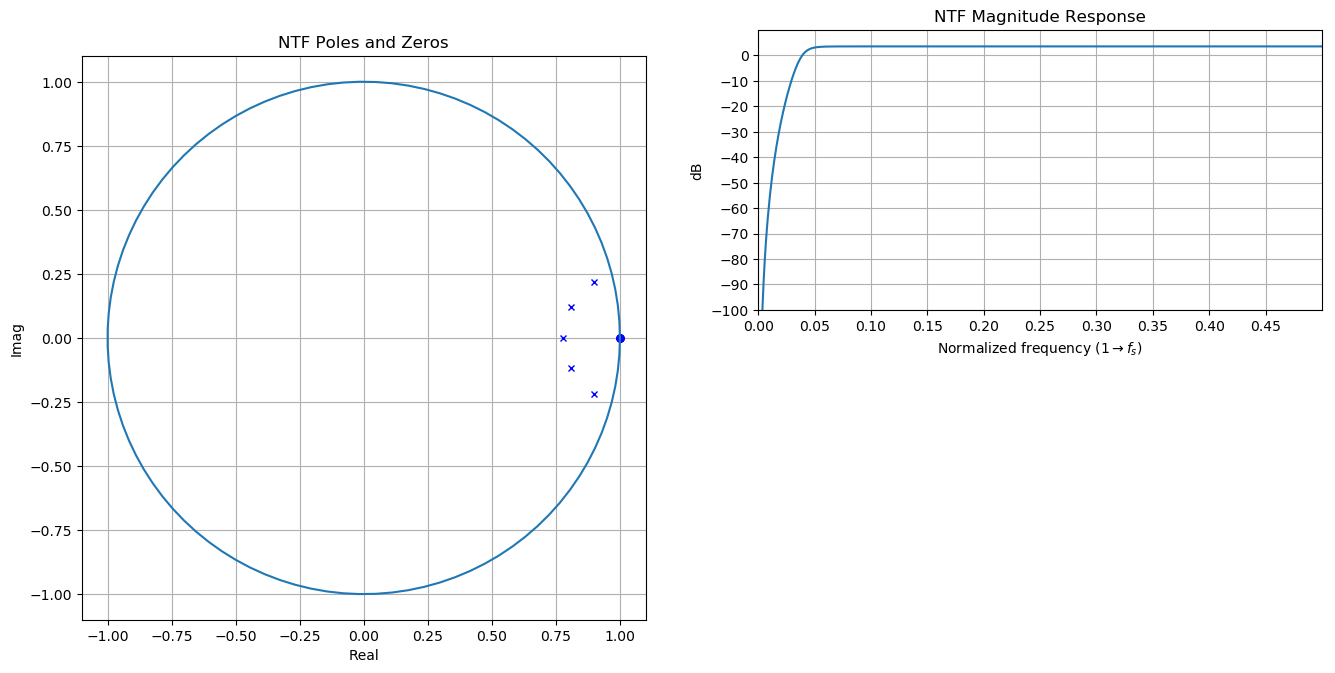

In [4]:
from __future__ import division
from deltasigma import *

OSR = 8
ORD = 5

# Synthesize!
H0 = synthesizeNTF(5, 8, opt=0)
# 1. Plot the singularities.
subplot(121)
plotPZ(H0, markersize=5)
title('NTF Poles and Zeros')
f = np.concatenate((np.linspace(0, 0.75/OSR, 100), np.linspace(0.75/OSR, 0.5, 100)))
z = np.exp(2j*np.pi*f)
magH0 = dbv(evalTF(H0, z))
# 2. Plot the magnitude responses.
subplot(222)
plot(f, magH0)
figureMagic([0, 0.5], 0.05, None, [-100, 10], 10, None, (16, 8))
xlabel('Normalized frequency ($1\\rightarrow f_s)$')
ylabel('dB')
title('NTF Magnitude Response')

TypeError: 'NoneType' object is not iterable

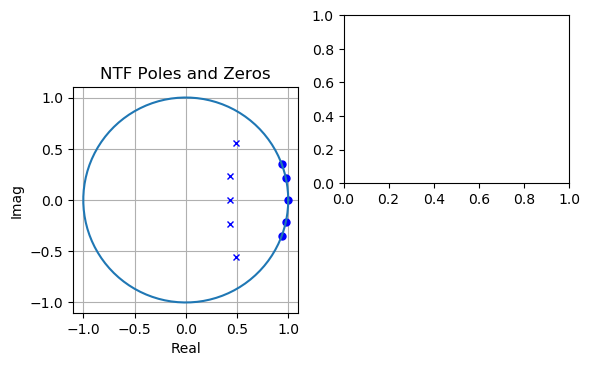

In [18]:
# Set parameters
form = 'CRFBD'
f0 = 0.0
Hinf = 4
OSR = 8
M = 4
ORD = 5

# Synthesize the NTF
H = synthesizeNTF(ORD, OSR, 1, Hinf, f0)
subplot(121)
plotPZ(H, markersize=5)
title('NTF Poles and Zeros')

f = np.concatenate((np.linspace(0, 0.75/OSR, 100), np.linspace(0.75/OSR, 0.5, 100)))
z = np.exp(2j*np.pi*f)
magH = dbv(evalTF(H, z))
# 2. Plot the magnitude responses.
subplot(222)
plot(f, magH)
figureMagic([0, 0.5], 0.05, None, [-100, 10], 10, None, (16, 8))
xlabel('Normalized frequency ($1\\rightarrow f_s)$')
ylabel('dB')
title('NTF Magnitude Response')


# Realize the NTF
a, g, b, c = realizeNTF(H, form)
# Create the ABCD matrix
ABCD = stuffABCD(a, g, b, c, form)
# Scale the ABCD matrix
ABCDs, umax, S = scaleABCD(ABCD, M+1)

# Calculate the transfer functions
[ntfs, stfs] = calculateTF(ABCDs)
# Convert NTFs to transfer function form
ntfs_nd = zpk2tf(ntfs[0], ntfs[1], ntfs[2])

# Initialize pretty printing for sympy
init_printing()
# Define the symbolic variable z
z = symbols('z')
# Create the polynomial expressions
Numerator = Poly(ntfs_nd[0], z)
Denominator = Poly(ntfs_nd[1], z)
# Calculate the Noise Transfer Function (NTF)
NTFS = Numerator / Denominator
# Simplify the expression for the Error Transfer Function (ETF)
He = simplify(1 - NTFS)

# display(He)
# display(Math(latex(Numerator)))
# display(Denominator)

NTF Structure:
[0.93734861-0.34839286j 0.93734861+0.34839286j 0.97772628-0.20988409j
 0.97772628+0.20988409j 1.        +0.j        ]
NTF Coefficients:
Component 0: (0.9373486102948341-0.348392856956564j)
Component 1: (0.9373486102948341+0.348392856956564j)
Component 2: (0.9777262758264504-0.209884086005847j)
Component 3: (0.9777262758264504+0.209884086005847j)
Component 4: (1.00000000000002+0j)
ABCD Matrix:
[[ 1.          0.          0.          0.          0.          0.12074139
  -0.12074139]
 [ 1.          0.95545255 -0.04454745  0.          0.          0.53246967
  -0.53246967]
 [ 0.          1.          1.          0.          0.          1.41819492
  -1.41819492]
 [ 0.          1.          1.          0.87469722 -0.12530278  2.70173036
  -2.70173036]
 [ 0.          0.          0.          1.          1.          2.54511274
  -2.54511274]
 [ 0.          0.          0.          0.          1.          1.
   0.        ]]
Transfer Function (NTF):
Numerator: Poly(1.0*z**5 - 4.83014977

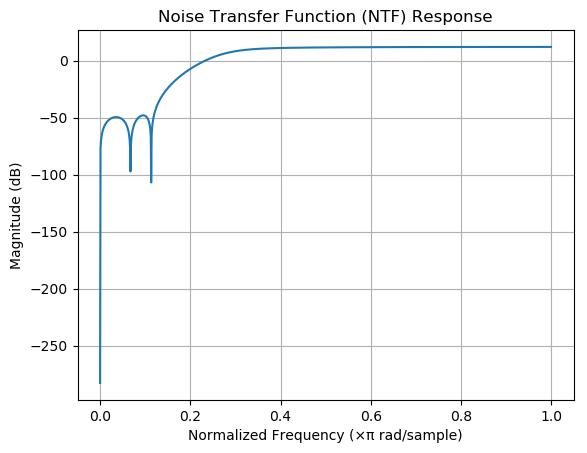

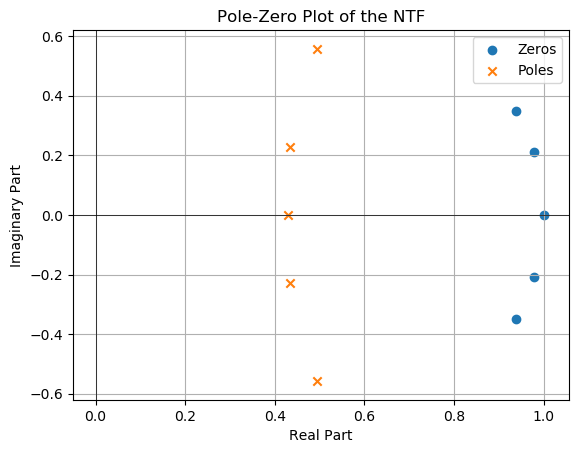

Error Transfer Function (He):
(2.54511274163908*z**4 - 7.04643262986857*z**3 + 8.06722611106105*z**2 - 4.38783242936243*z + 0.942667600008713)/(1.0*z**5 - 2.28503703060351*z**4 + 2.44959860595273*z**3 - 1.42880512476025*z**2 + 0.442317342880169*z - 0.0573323999912908)


In [3]:
from iir_filter import *
from scipy.signal import zpk2tf, freqz
from deltasigma import *
from sympy import symbols, Poly, simplify, init_printing
import matplotlib.pyplot as plt
import numpy as np

def print_ntf_structure(ntf):
    """Prints the structure of the NTF to debug."""
    print("NTF Structure:")
    print(ntf)

def print_ntf_coefficients(ntf):
    """Prints the coefficients of the NTF."""
    print("NTF Coefficients:")
    for i, component in enumerate(ntf):
        print(f"Component {i}: {component}")

def plot_ntf_response(ntfs_nd):
    """Plots the magnitude response of the NTF."""
    w, h = freqz(ntfs_nd[0], ntfs_nd[1], worN=1024)
    plt.figure()
    plt.plot(w / np.pi, 20 * np.log10(abs(h)))
    plt.title("Noise Transfer Function (NTF) Response")
    plt.xlabel("Normalized Frequency (×π rad/sample)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.show()

def plot_poles_zeros(ntfs_nd):
    """Plots the pole-zero diagram of the NTF."""
    z = np.roots(ntfs_nd[0])
    p = np.roots(ntfs_nd[1])
    plt.figure()
    plt.scatter(np.real(z), np.imag(z), label="Zeros", marker='o')
    plt.scatter(np.real(p), np.imag(p), label="Poles", marker='x')
    plt.title("Pole-Zero Plot of the NTF")
    plt.xlabel("Real Part")
    plt.ylabel("Imaginary Part")
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.grid()
    plt.legend()
    plt.show()

def print_abcd_matrix(ABCD):
    """Prints the ABCD matrix."""
    print("ABCD Matrix:")
    print(ABCD)

def print_transfer_function(Numerator, Denominator):
    """Prints the transfer function as a ratio of polynomials."""
    print("Transfer Function (NTF):")
    print("Numerator:", Numerator)
    print("Denominator:", Denominator)
    print("NTF (in symbolic form):")
    print(Numerator / Denominator)

def print_error_transfer_function(He):
    """Prints the simplified Error Transfer Function (ETF)."""
    print("Error Transfer Function (He):")
    print(He)

def main():
    # Initialize pretty printing for sympy
    init_printing()

    # Set parameters
    form = 'CRFBD'
    f0 = 0.0
    Hinf = 4
    OSR = 8
    M = 4
    ORD = 5

    # Synthesize the NTF
    H = synthesizeNTF(ORD, OSR, 1, Hinf, f0)

    # Realize the NTF
    a, g, b, c = realizeNTF(H, form)

    # Create the ABCD matrix
    ABCD = stuffABCD(a, g, b, c, form)

    # Scale the ABCD matrix
    ABCDs, umax, S = scaleABCD(ABCD, M+1)

    # Calculate the transfer functions
    [ntfs, stfs] = calculateTF(ABCDs)

    # Debug the NTF structure
    print_ntf_structure(ntfs[0])

    # Print the NTF coefficients
    print_ntf_coefficients(ntfs[0])

    # Print the ABCD matrix
    print_abcd_matrix(ABCD)

    # Convert the NTF to transfer function form
    ntfs_nd = zpk2tf(ntfs[0], ntfs[1], ntfs[2])

    # Define the symbolic variable z
    z = symbols('z')

    # Create the polynomial expressions
    Numerator = Poly(ntfs_nd[0], z)
    Denominator = Poly(ntfs_nd[1], z)

    # Print the NTF as a transfer function
    print_transfer_function(Numerator, Denominator)

    # Plot the NTF magnitude response
    plot_ntf_response(ntfs_nd)

    # Plot the NTF poles and zeros
    plot_poles_zeros(ntfs_nd)

    # Calculate the Noise Transfer Function (NTF)
    NTFS = Numerator / Denominator

    # Simplify the expression for the Error Transfer Function (ETF)
    He = simplify(1 - NTFS)

    # Print the Error Transfer Function (ETF)
    print_error_transfer_function(He)

if __name__ == "__main__":
    main()
